# Преобразование признаков. Нормализация. Стандартизация

*Проектирование признаков подразумевает под собой изменение данных, их удаление, создание и тд. В этом юните мы изучим основы преобразования признаков и реализацию этих методов в Python.*

В машинном обучении данные часто подвергают различным преобразованиям. Самые популярные из них — это ***нормализация*** и ***стандартизация***, которые мы рассмотрим в этом юните.

***Примечание.*** Операции нормализации и стандартизации также часто называют ***шкалированием.***

***Проблема***
*Часто данные для обучения представлены в различных единицах измерения, в разном масштабе. Например, в наборе данных может быть представлен признак кадастровая стоимость недвижимости, которая измеряется в миллионах рублей, и признак понижающий коэффициент, который используется для определения налога на недвижимость и измеряется в сотых долях. Или, например, в одном наборе данных встречается признак доход клиента и стаж работы на последнем месте. Стаж в редких случаях поднимается выше 10, тогда как доход измеряется тысячами.*

Результат эффективности работы будет формироваться в большей степени за счёт переменной, обозначающей доход из-за больших значений, которые может принимать переменная. Вклад второй переменной в итоговую оценку незначителен из-за её небольших значений Это связано только с тем, что входные данные имеют разный масштаб, а не из-за того, что вторая переменная не значима для результата.

Таким образом, признаки, которые измеряются в разных масштабах, в разной степени влияют на предсказание модели. Для решения этой проблемы перед обучением обычно делают ***преобразование признаков.***

Рассмотрим такие преобразования, как ***нормализация и стандартизация.***

## Нормализация

***Нормализация*** — один из методов преобразования входных признаков, при котором значения признаков приводятся к неким безразмерным единицам в рамках заданного диапазона (например, [0,...,1] или [-1,...,1]) либо с каким-то заданным свойством (например, стандартным отклонением, равным 1).

Существует несколько способов нормализации: *MinMaxScaler, RobustScaler.*

✏️ Попробуем на обучающем примере применить различные способы нормализации к распределениям и увидеть разницу между ними.

Используем библиотеку numpy для создания массивов случайных чисел различных распределений. Выполните этот код, чтобы создать обучающий набор различных распределений:

In [1]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)
display(df)

,beta,exponential,normal_p,normal_l
0,39.273740,2.263890,11.860245,4.748207
1,55.030395,13.108592,11.796582,10.959172
2,47.434682,3.312019,11.146945,3.919227
3,43.173536,17.664301,8.266689,42.072915
4,45.681443,2.109760,5.112983,16.960664
...,...,...,...,...
995,50.976583,3.748883,7.057497,9.609427
996,46.290172,1.195512,8.419497,14.972852
997,58.912029,7.014868,11.541732,33.654934
998,52.185621,2.391140,11.819914,6.091417


Сгенерированные распределения выбраны случайным образом, однако вы можете встретить их, например, в таких наборах данных:

- ***Бета-распределение*** моделирует вероятность. Например, коэффициент конверсии клиентов, купивших что-то на сайте.

- ***Экспоненциальное распределение***, предсказывающее периоды времени между событиями. Например, время ожидания автобуса.

- ***Нормальное распределение***, например распределение роста и веса человека.

Рассмотрим распределения на графике. Метод визуализации [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) — это метод визуализации распределения наблюдений в наборе данных. Он представляет собой непрерывную линию плотности вероятности. Подробнее об этой функции вы можете прочитать в [руководстве](https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde).

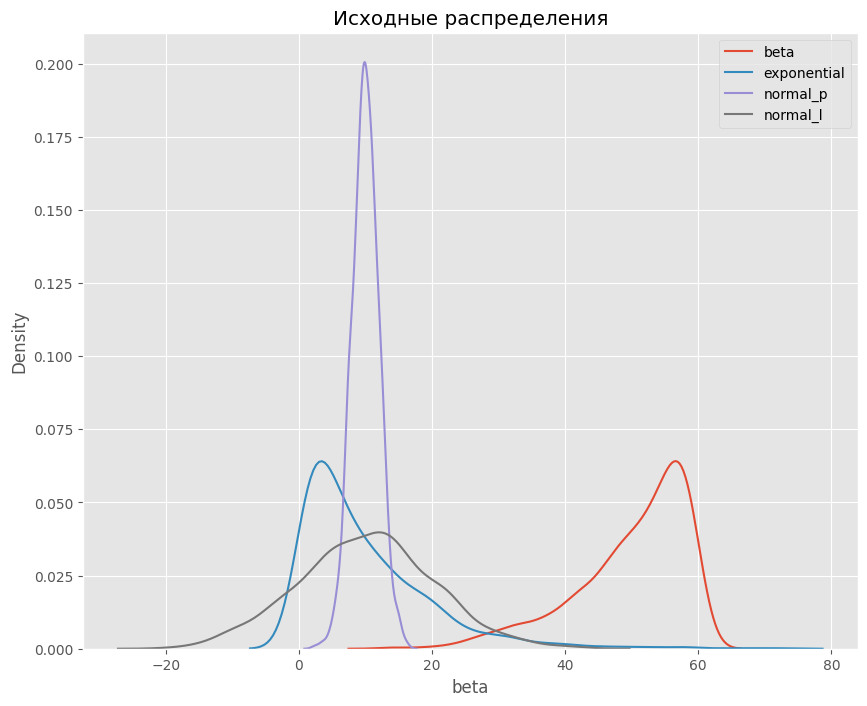

In [3]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

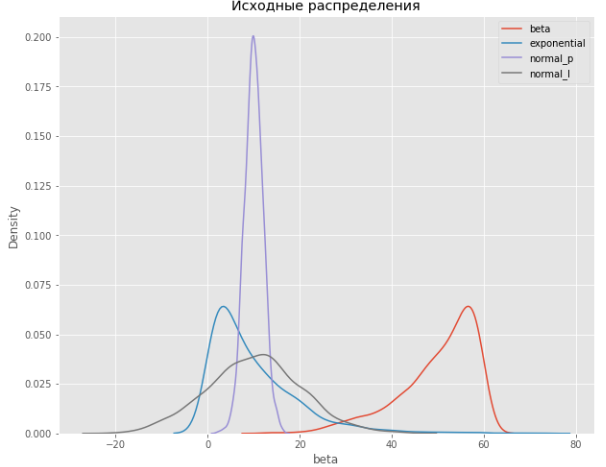

Признаки распределены по-разному: смещены влево, вправо, присутствуют отрицательные величины. Попробуем нормализовать их.

Зафиксируем описательные статистики до преобразований.

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


Для нормализации данных мы будем использовать уже знакомую нам библиотеку sklearn.

### MinMaxScaler

При применении нормализации методом MinMaxScaler все значения признаков будут преобразованы в диапазон [0,1], что означает, что минимальное и максимальное значение признака будет равно 0 и 1 соответственно.

Нормализация происходит следующим способом:

Из каждого значения признака х вычитается минимальное значение этого признака:  *x-min*
Результат вычитания делится на разность между максимумом и минимумом признака: *max - min*

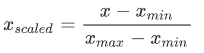

***Например, температура в горном посёлке за день может меняться от 10 до 35 градусов. Текущая температура составляет 17 градусов.***

Нормализуем это значение:

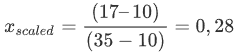

Нормализованное значение 0.28 лежит в диапазоне от 0 до 1, и ближе к левой границе распределения (0), что соответствует также ненормализованному распределению (значение 17 ближе к 10).

Проведём нормализацию распределений признаков из обучающего примера.

Класс [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) делает вышеописанную нормализацию автоматически при помощи функции преобразования fit_transform. Вы познакомитесь с ней подробнее в модулях машинного обучения.

<Axes: title={'center': 'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

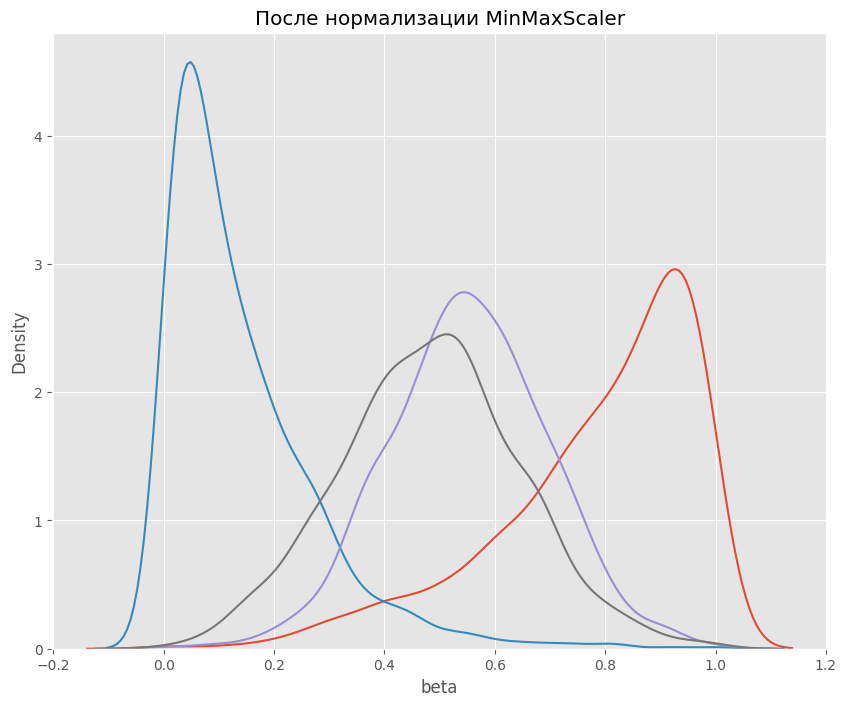

In [7]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

Так выглядят распределения после нормализации MinMaxScaler:

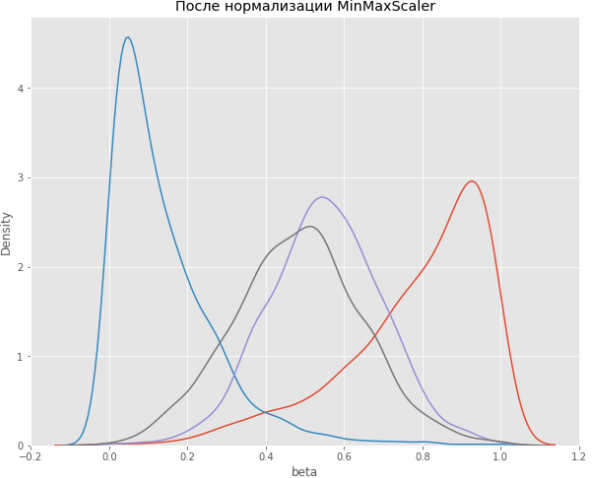

А так — описательные статистики:

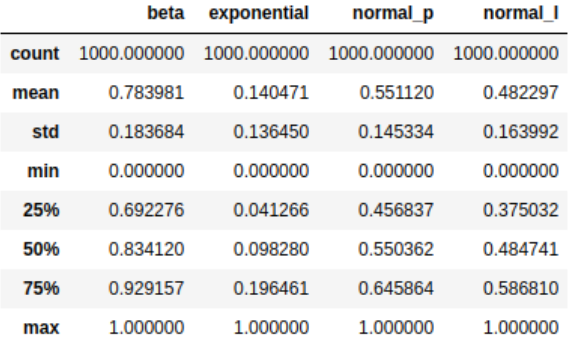

Как мы видим, значения расположились в диапазоне от минимального 0 до максимального 1, как и должно произойти при таком способе нормализации. Также сохранилась форма исходного распределения: скошенные влево/вправо распределения сохранили свою форму.

Теперь рассмотрим нормализацию методом RobustScaler, а затем сравним их.

### RobustScaler

Нормализация методом RobustScaler происходит в несколько этапов:

1. из каждого значения признака вычитается медиана признака: *x - медиана*
2. полученное значение делится на межквартильный размах: 75% - значение 25%

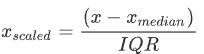

***Например, имеется числовой ряд [1, 2, 3, 4, 5]. Медиана ряда — 3. Межквартильный размах: . Мы хотим нормализовать число 4.***

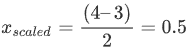

Таким образом, значение 4 после нормализации приняло значение 0.5.

Проведём нормализацию распределений признаков из обучающего примера, используя класс [RobustScaler.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

<Axes: title={'center': 'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

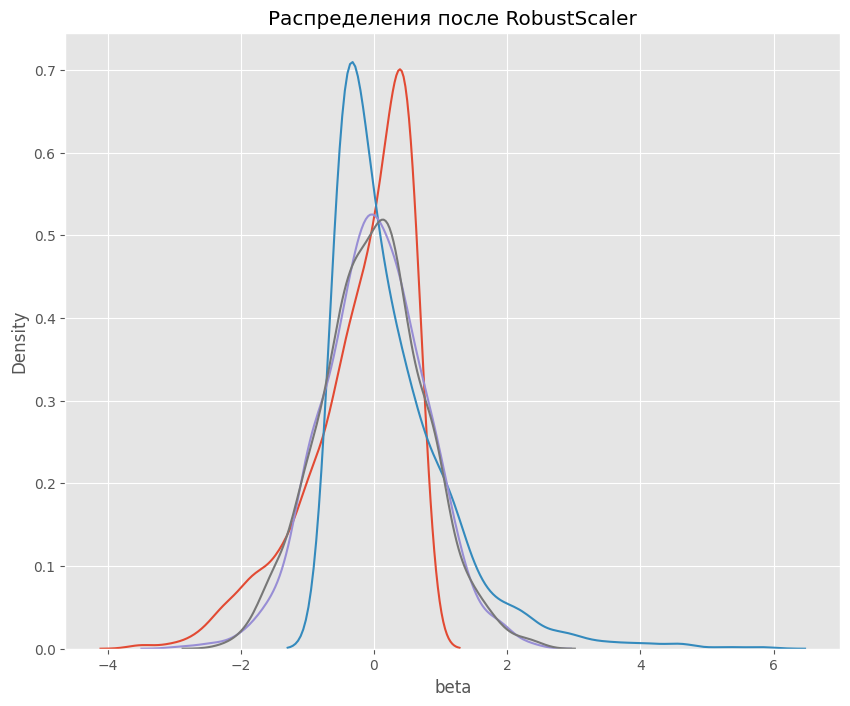

In [18]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

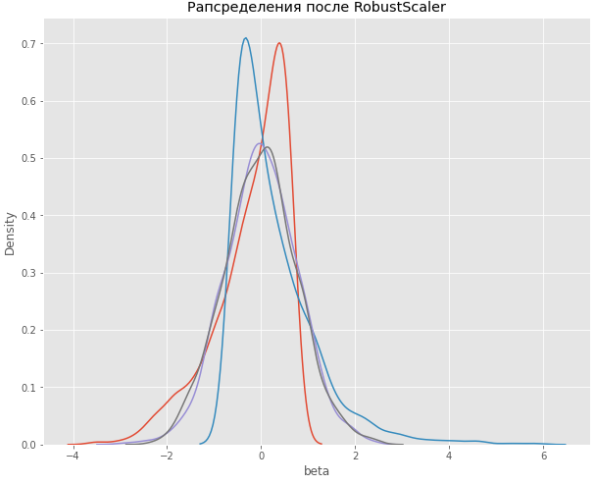

Описательные статистики после нормализации:

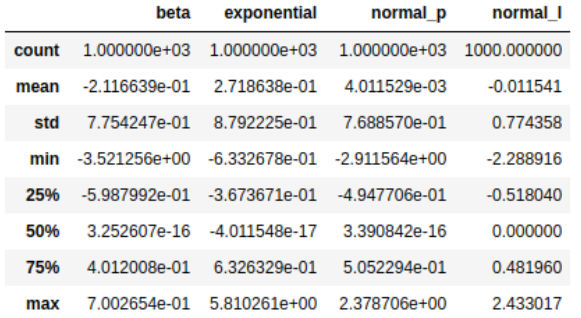

Из описательных статистик видно, что RobustScaler не масштабирует данные в заданный интервал, как делает это MinMaxScaler. Однако распределения не сохранили своё исходное состояние. Левый хвост экспоненциального распределения стал практически незаметным. То же произошло и с бета-распределением. Они стали более нормальными.

### В чём разница?

Поскольку *MinMaxScaler* использует в своём вычислении минимальное и максимальное значения признака, то этот способ будет чувствителен к наличию выбросов в распределении.

*RobustScaler* в вычислении использует перцентили, и поэтому не зависит даже от большого количества выбросов.

Поэтому, если ваши данные уже были очищены от выбросов, смело используйте MinMaxScaler. Этот алгоритм нормализации используется специалистами по данным чаще всего в силу его простоты и понятности, а данные на этом этапе чаще всего уже очищены. Если вы пропустили этап очистки данных и нормализуете признаки раньше, используйте нормализатор *RobustScaler.*

Больше о других способах нормализации и их сравнении вы можете прочитать в [официальном руководстве scikit-learn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).

## Стандартизация 

***Стандартизация*** — ещё один метод преобразования входных признаков, при котором изменяется распределение таким образом, чтобы среднее значений равнялось 0, а стандартное отклонение — 1. 

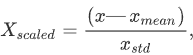

где xstd — стандартное отклонение.

***Например, у нас есть числовой ряд [1, 2, 3, 4, 5]. Среднее ряда: 3. Стандартное отклонение — 1.4. Нормализуем число 4.***

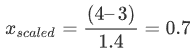

Нормализованное число 4 равно 0.7.

Этот процесс можно описать как ***центрирование данных с масштабированием***. Сначала происходит вычитание среднего значения из всех данных — центрирование,  а затем деление на отклонение. 

### Для чего необходимо такое преобразование?

Как и нормализация, стандартизация может быть полезна при данных с разными масштабами. Однако в отличие от нормализации стандартизация предполагает, что признак распределён нормально.

Чтобы понять, как стандартизация меняет распределение, рассмотрим метод стандартизации *StandardScaler* в *Python.*

Продолжим использовать обучающий пример, сгенерированный нами при изучении нормализации данных. Стандартизируем признаки в исходном наборе данных.

### StandardScaler

Для стандартизации используем класс [StandardScaler.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.075140e-16,-1.776357e-18,8.100187e-16,-2.398082e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.270238e+00,-1.029983e+00,-3.793988e+00,-2.942457e+00
25%,-4.995057e-01,-7.274049e-01,-6.490566e-01,-6.544169e-01
50%,2.731017e-01,-3.093641e-01,-5.220134e-03,1.491105e-02
75%,7.907555e-01,4.105327e-01,6.522262e-01,6.376219e-01
max,1.176627e+00,6.302351e+00,3.090149e+00,3.158464e+00


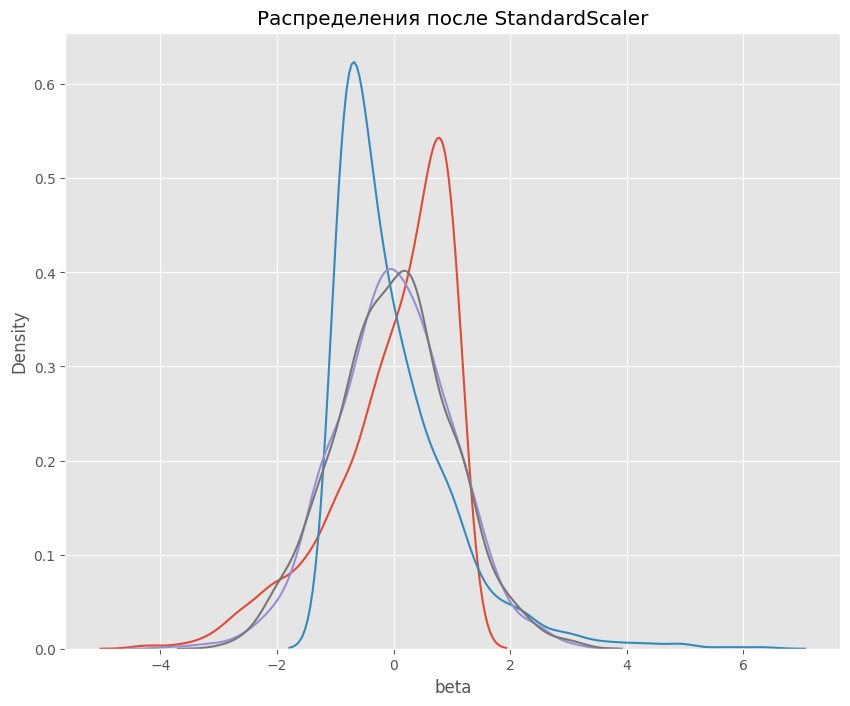

In [12]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)
df_s.describe()

Распределения после стандартизации:

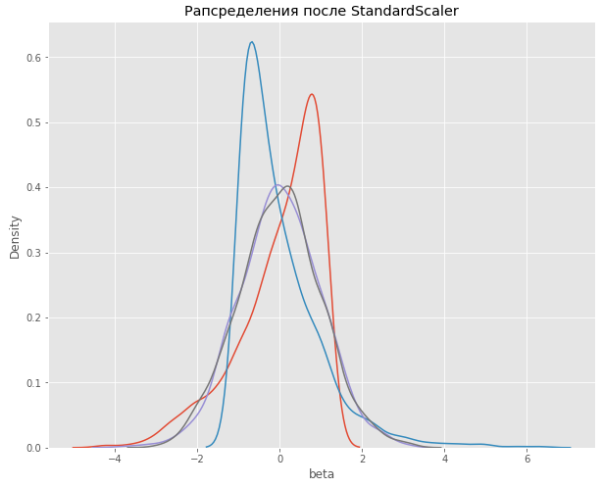

Описательные статистики после нормализации:

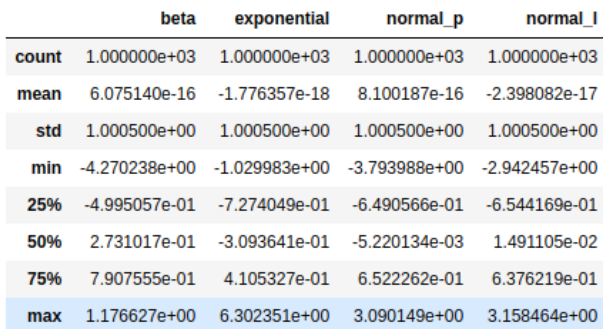

Стандартное отклонение стало равным 1, а средние значения — 0. Распределения изменились подобно RobustScaler — стали более ***нормальными.***

### Нормализовать или стандартизировать?

Так как нормализация и стандартизация преследуют одни и те же цели, возникают вопросы:

Когда признаки необходимо нормализовать, а когда стандартизировать? Какой способ нормализации выбрать? 

Преобразование входных переменных и выбор способа преобразования зависит от конкретной задачи и данных — заранее невозможно узнать, какое преобразования будет лучше. 

Однако мы составили небольшую ***инструкцию по преобразованию признаков:***

- если признак распределён нормально, то его необходимо стандартизировать;
- если признак распределён ненормально, его необходимо нормализовать;
- если разброс значений небольшой, то можно обойтись без преобразования данных.

Выбор определённого способа преобразования и его необходимости может быть нелёгкой задачей, поэтому пробуйте делать различные преобразования и оценивайте результаты на конкретной модели, смотрите, есть ли разница в улучшении качества модели. О том, как сравнивать модели, вы узнаете далее в курсе в модулях про машинное обучение.

Что лучше? Нормализовать, а потом стандартизировать или наоборот?

Комбинации преобразований также могут быть эффективны. Поэтому проводите эксперименты над моделью и выбирайте то сочетание преобразований, которые обеспечивают лучший результат на ваших данных.

Для закрепления пройденного материала выполните задания ниже. ⬇️

### Задание 6.1

Преобразование признаков — это…

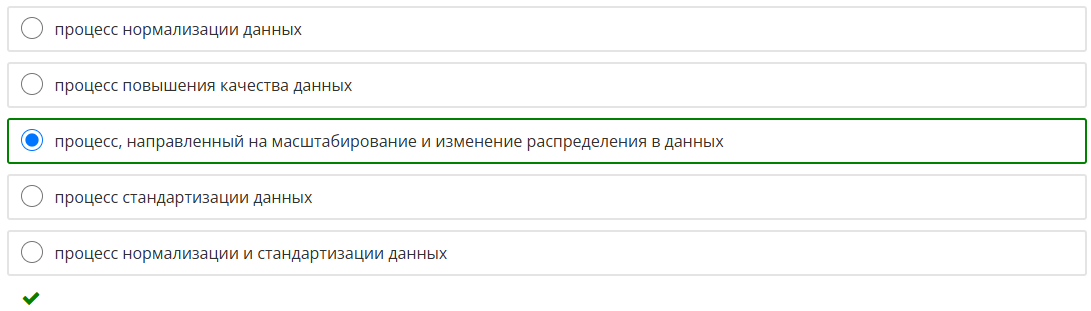

### Задание 6.2

Выберите верные утверждения о нормализации данных методом MinMaxScaler:

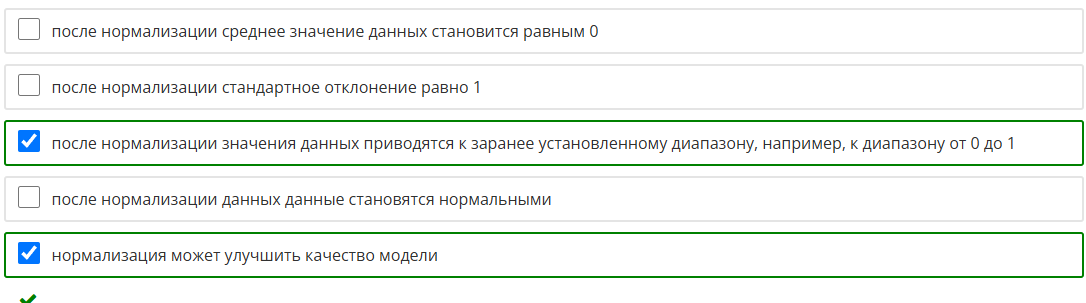

### Задание 6.3

Выберите верные утверждения о стандартизации данных:

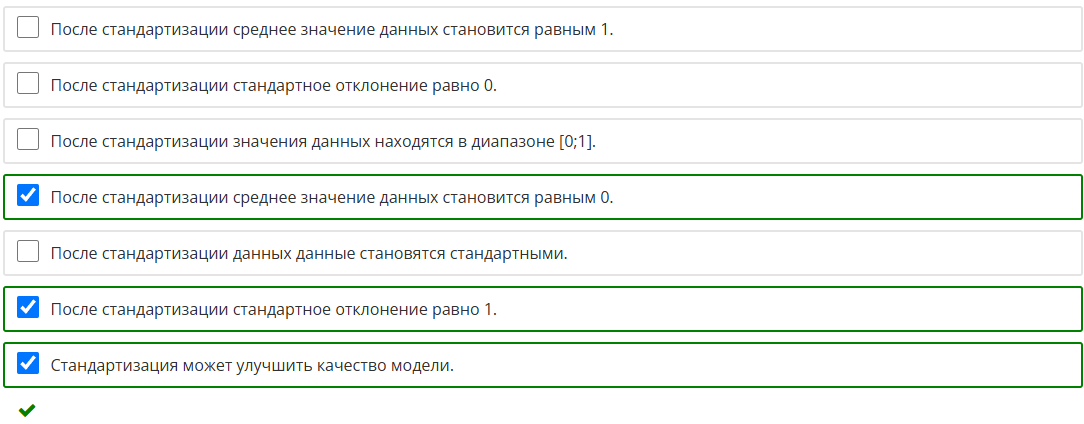

### Задание 6.4

Нормализуйте признак price. Выберите подходящий тип нормализации, учитывая тот факт, что в данных присутствуют вина с выбросной стоимостью.

В ответе напишите результат выполнения кода data['price'].sum(), округлённый до целого.

,points,price
count,129971.000000,129971.000000
mean,88.447138,35.363389
std,3.039730,39.577066
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,28.000000
75%,91.000000,40.000000
max,100.000000,3300.000000


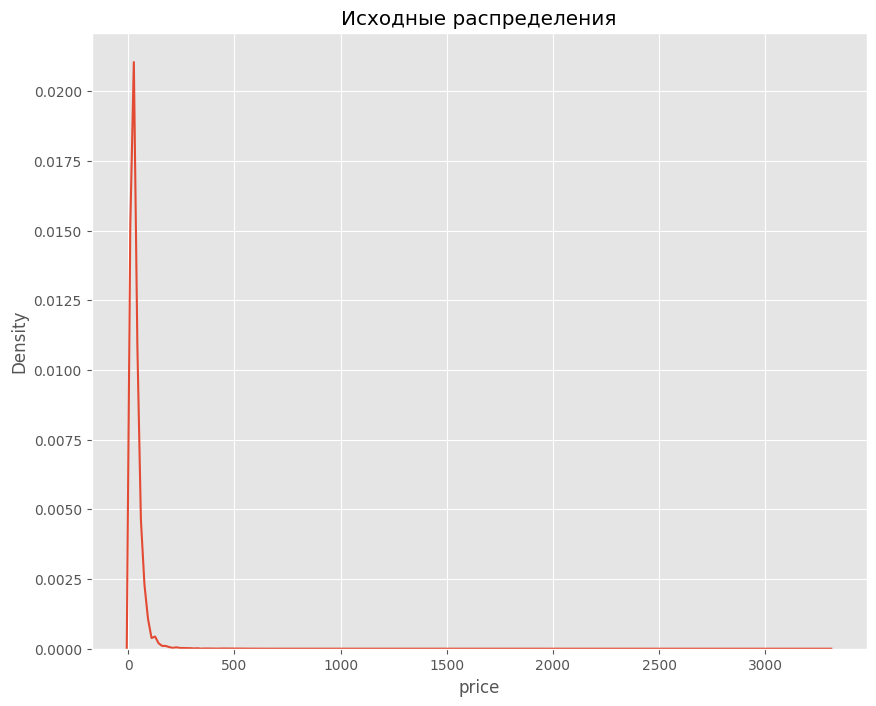

In [43]:
wine_data = pd.read_csv('data/wine_cleared.csv', sep=',', index_col=0)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(wine_data ['price'], ax=ax1, label ='price')
wine_data.describe()


43501


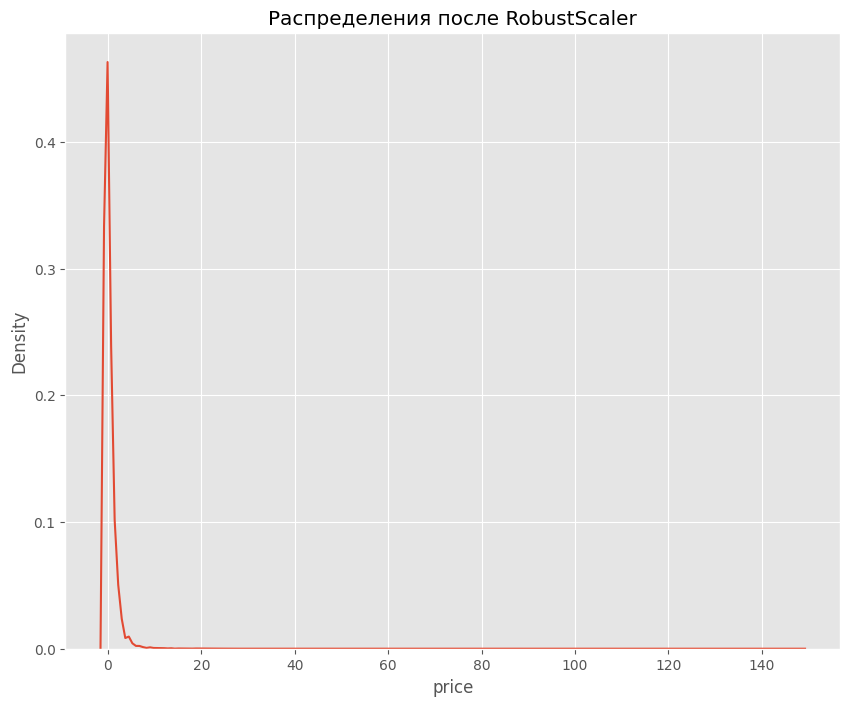

In [ ]:
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
wine_data_r = r_scaler.fit_transform(wine_data[['price']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
wine_data_r = pd.DataFrame(wine_data_r, columns=['price'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(wine_data_r['price'], ax=ax1)


In [64]:
print(wine_data['price'].describe())
print(wine_data_r.describe())

count    129971.000000
mean         35.363389
std          39.577066
min           4.000000
25%          18.000000
50%          28.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64
              price
count  1.299710e+05
mean  -2.520256e-17
std    1.000004e+00
min   -7.924668e-01
25%   -4.387252e-01
50%   -1.860526e-01
75%    1.171544e-01
max    8.248841e+01


In [69]:
print(round(wine_data_r['price'].sum()))

43501


### Задание 6.5

Стандартизируйте ***исходный*** признак price.

В ответе напишите результат выполнения кода data['price'][129968]. Ответ округлите до сотых.

               price
count  129971.000000
mean        0.334700
std         1.798958
min        -1.090909
25%        -0.454545
50%         0.000000
75%         0.545455
max       148.727273
count    129971.000000
mean         35.363389
std          39.577066
min           4.000000
25%          18.000000
50%          28.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64


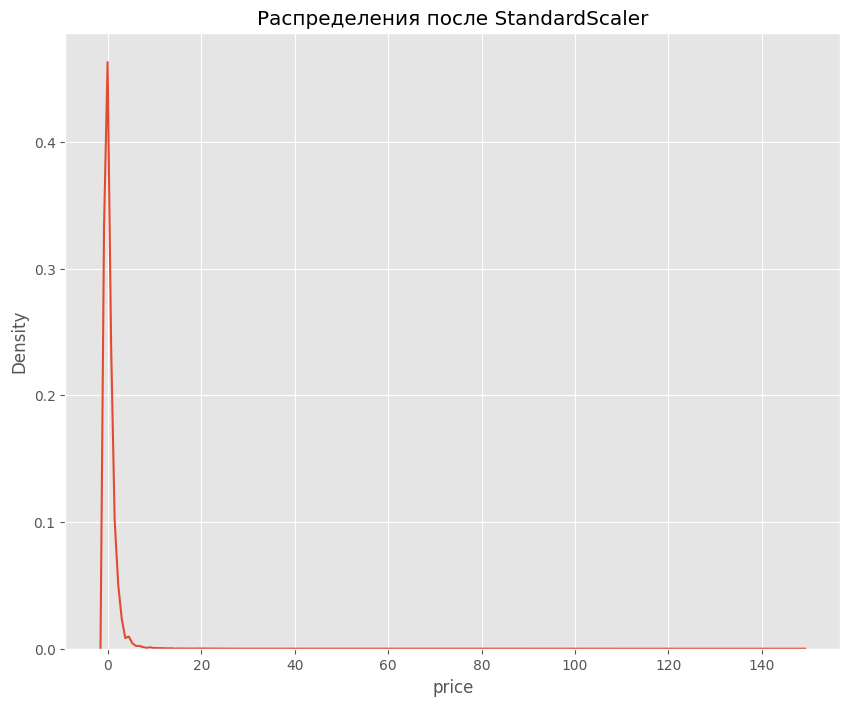

In [68]:
# инициализируем стандартизатор StandardScaler
st_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
wine_data_st = st_scaler.fit_transform(wine_data[['price']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
wine_data_st = pd.DataFrame(wine_data_st, columns=['price'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(wine_data_r['price'], ax=ax1)
print(wine_data_r.describe())
print(wine_data['price'].describe())

In [60]:
round(wine_data_r['price'][129968],2)

np.float64(-0.14)